In [21]:
import pandas as pd
import os
import matplotlib.pyplot as plt


experiment_path = "outputs/exp_1/"
image_path = experiment_path + "/plots/"
os.makedirs(image_path, exist_ok=True)

# file_postfix = "1" # 1 and 30
# file_postfix = "1" # 1 and 30
# file_postfix = "10" # 1 and 30
file_postfix = "30" # 1 and 30

df_unity = pd.read_feather(f"{experiment_path}/unity_{file_postfix}.feather")
df_psutil = pd.read_feather(f"{experiment_path}/psutil_{file_postfix}.feather")

def save_fig(fig_name):
    plt.title(f"Run: {file_postfix}, Metric: {fig_name}")
    plt.savefig(image_path + "/" + fig_name + f"_{file_postfix}.png")

In [22]:
df_unity

,num_envs,env_index,num_iters,exec_time,start_timestamp,timestamp
0,1,0,20,3.989581,1.712043e+09,1.712043e+09
1,2,1,20,3.986117,1.712043e+09,1.712043e+09
2,2,0,20,3.989119,1.712043e+09,1.712043e+09
3,3,2,20,3.989297,1.712043e+09,1.712043e+09
4,3,0,20,3.993296,1.712043e+09,1.712043e+09
...,...,...,...,...,...,...
856,41,28,20,129.313882,1.712044e+09,1.712044e+09
857,41,32,20,133.837574,1.712044e+09,1.712044e+09
858,41,18,20,145.556666,1.712044e+09,1.712044e+09
859,41,21,20,144.117736,1.712044e+09,1.712044e+09


In [23]:
df_unity.columns
df_unity.start_timestamp.unique()

array([1.71204317e+09, 1.71204318e+09, 1.71204319e+09, 1.71204320e+09,
       1.71204321e+09, 1.71204322e+09, 1.71204324e+09, 1.71204325e+09,
       1.71204326e+09, 1.71204327e+09, 1.71204329e+09, 1.71204330e+09,
       1.71204331e+09, 1.71204333e+09, 1.71204334e+09, 1.71204335e+09,
       1.71204337e+09, 1.71204338e+09, 1.71204340e+09, 1.71204342e+09,
       1.71204343e+09, 1.71204345e+09, 1.71204347e+09, 1.71204349e+09,
       1.71204351e+09, 1.71204353e+09, 1.71204355e+09, 1.71204358e+09,
       1.71204360e+09, 1.71204363e+09, 1.71204366e+09, 1.71204369e+09,
       1.71204373e+09, 1.71204376e+09, 1.71204381e+09, 1.71204385e+09,
       1.71204391e+09, 1.71204398e+09, 1.71204406e+09, 1.71204417e+09,
       1.71204432e+09])

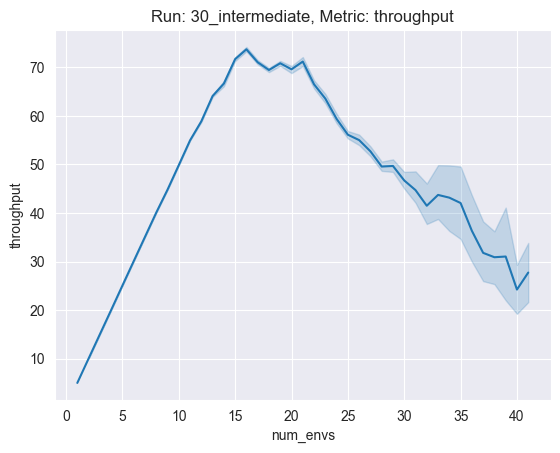

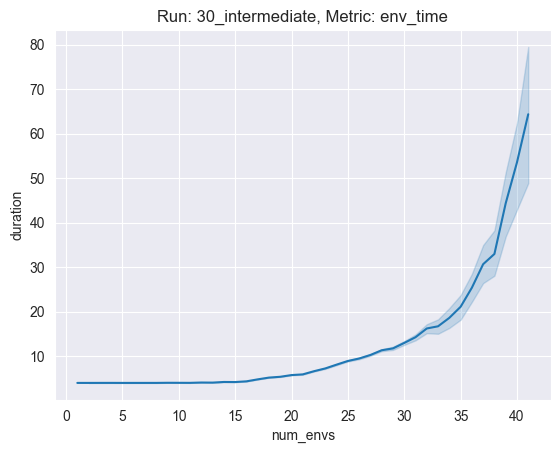

In [24]:
from matplotlib import pyplot as plt
import seaborn as sns
# df = df_unity.copy().where(df_unity["num_iters"] == 500)
df = df_unity.copy()
df["duration"] =  df["timestamp"] - df["start_timestamp"]
df["throughput"] = (df["num_iters"] / df["duration"]) * df["num_envs"]
# sns.lineplot(df, x="timestamp", y="throughput")
# plt.show()
sns.lineplot(df, x="num_envs", y="throughput")
save_fig("throughput")
plt.show()
# sns.lineplot(df, x="num_envs", y="exec_time")
# plt.show()
sns.lineplot(df, x="num_envs", y="duration")
save_fig("env_time")
plt.show()

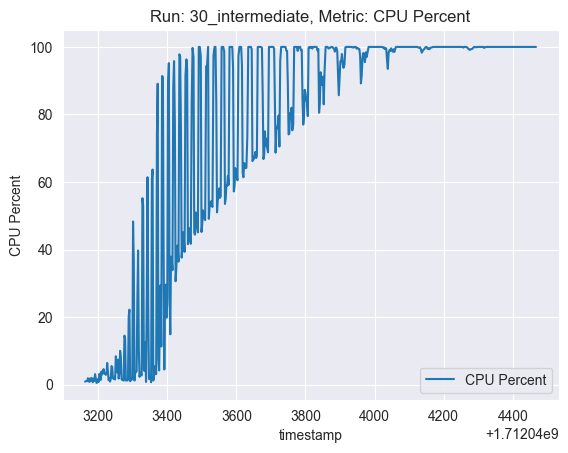

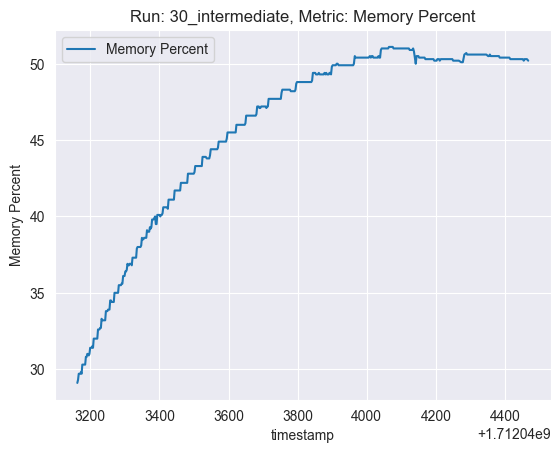

In [26]:
for column in df_psutil.columns:
    if column in ["CPU Percent", "Memory Percent"]:
        sns.lineplot(df_psutil, x="timestamp", y=column, label=column)
        save_fig(column)
        plt.show()

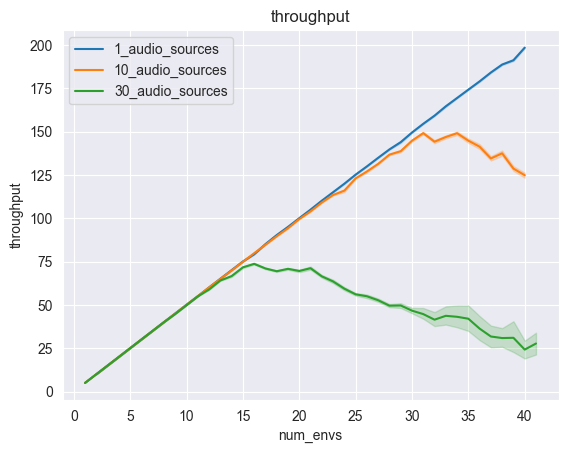

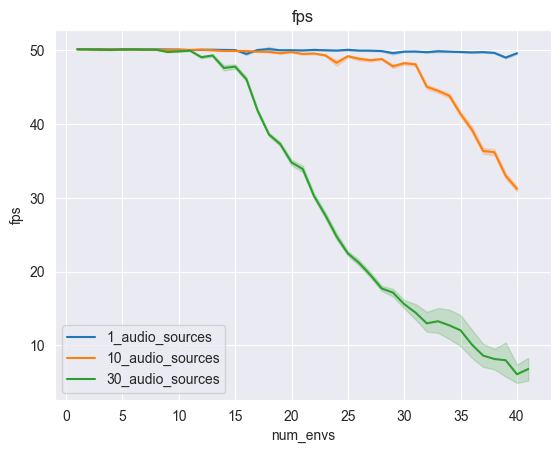

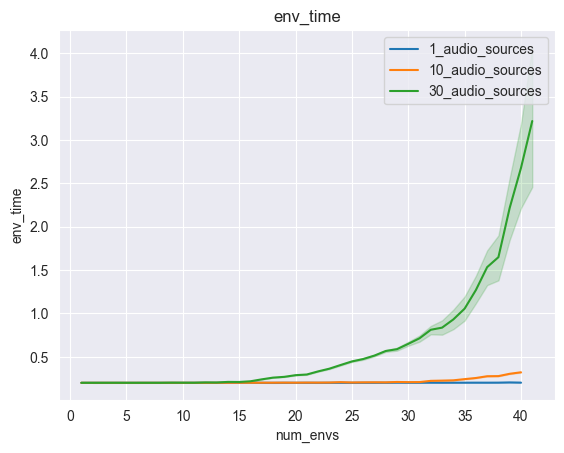

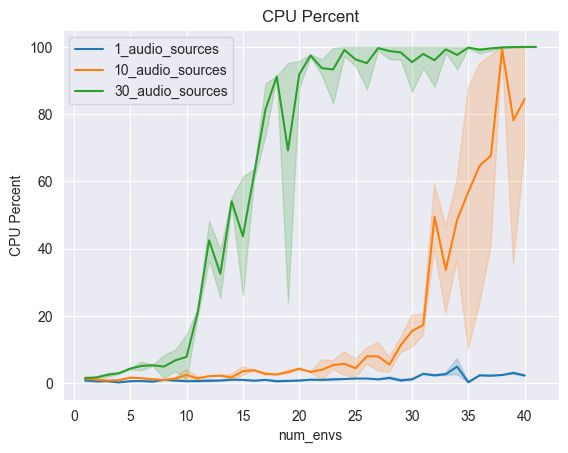

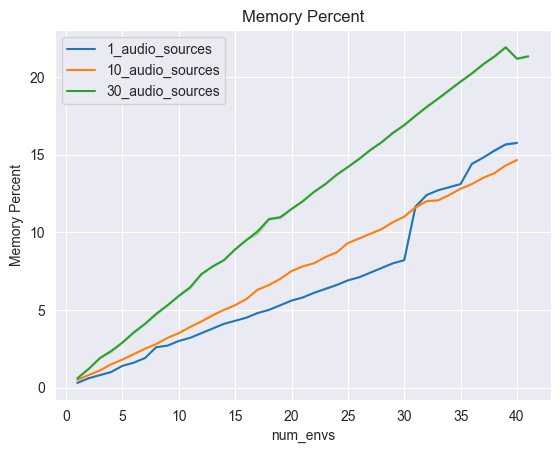

In [27]:
import pandas as pd
import matplotlib.pyplot as plt


experiment_path = "outputs/exp_1/"
image_path = experiment_path + "/plots/"

# file_postfix = "1" # 1 and 30
# file_postfix = "1" # 1 and 30
# file_postfix = "10" # 1 and 30
# file_postfix = "30" # 1 and 30
files = ["1", "10", "30"]
labels = ["1_audio_sources", "10_audio_sources", "30_audio_sources"]
dfs_unity = [pd.read_feather(f"{experiment_path}/unity_{x}.feather") for x in files]
dfs_psutil = [pd.read_feather(f"{experiment_path}/psutil_{x}.feather") for x in files]

def save_fig(fig_name):
    plt.title(f"{fig_name}")
    plt.savefig(image_path + "/" + fig_name + f"_combined.png")

from matplotlib import pyplot as plt
import seaborn as sns
# df = df_unity.copy().where(df_unity["num_iters"] == 500)
for df in dfs_unity:
    df["duration"] =  df["timestamp"] - df["start_timestamp"]
    df["env_time"] = df["duration"] / df["num_iters"]
    df["throughput"] = (df["num_iters"] / df["duration"]) * df["num_envs"]
    df["fps"] = 1 / df["env_time"] * 10

for i, df in enumerate(dfs_unity):
    sns.lineplot(df, x="num_envs", y="throughput", label=labels[i])
save_fig("throughput")
plt.show()
for i, df in enumerate(dfs_unity):
    sns.lineplot(df, x="num_envs", y="fps", label=labels[i])
save_fig("fps")
plt.show()
for i, df in enumerate(dfs_unity):
    sns.lineplot(df, x="num_envs", y="env_time", label=labels[i])
save_fig("env_time")
plt.show()

for column in df_psutil.columns:
    if column in ["CPU Percent", "Memory Percent"]:
        for i, df in enumerate(dfs_psutil):
            df2 = df.copy()
            end_times = (dfs_unity[i].groupby(["start_timestamp"])["exec_time"].max() +  dfs_unity[i].groupby(["start_timestamp"])["start_timestamp"].max()).to_dict()
            def timestamp_to_env(timestamp):
                for k, start_time in enumerate(end_times.keys()):
                    if timestamp >= start_time and timestamp < end_times[start_time]:
                        return k+1
                return None  # Given value did not happen during any measurement run
            df2["num_envs"] = df2.apply(lambda row: timestamp_to_env(row["timestamp"]), axis=1)
            df2["Memory Percent"] = df2["Memory Percent"] - df2["Memory Percent"].min()
            df2 = df2.dropna(axis=0)
            sns.lineplot(df2, x="num_envs", y=column, label=labels[i])
        save_fig(column)
        plt.show()

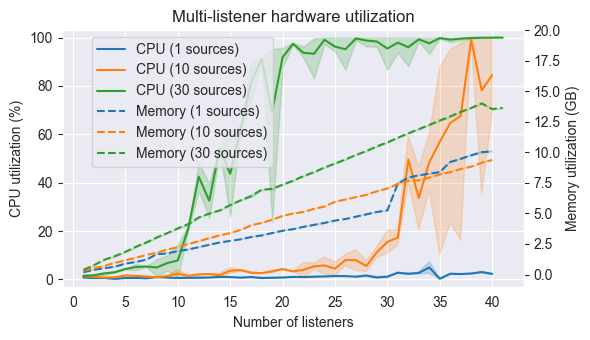

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

experiment_path = "outputs/exp_1/"
image_path = experiment_path + "/plots/"
files = ["1", "10", "30"]
labels = ["1_audio_sources", "10_audio_sources", "30_audio_sources"]
dfs_unity = [pd.read_feather(f"{experiment_path}/unity_{x}.feather") for x in files]
dfs_psutil = [pd.read_feather(f"{experiment_path}/psutil_{x}.feather") for x in files]

def save_fig(fig_name):
    plt.title(f"{fig_name}")
    plt.savefig(image_path + "/" + fig_name + f"_combined.png")

# fig, ax1 = plt.subplots()
fig, ax1 = plt.subplots(figsize=(6, 3.5))
ax2 = ax1.twinx()

for i, df in enumerate(dfs_psutil):
    df2 = df.copy()
    end_times = (dfs_unity[i].groupby(["start_timestamp"])["exec_time"].max() + dfs_unity[i].groupby(["start_timestamp"])["start_timestamp"].max()).to_dict()
    def timestamp_to_env(timestamp):
        for k, start_time in enumerate(end_times.keys()):
            if timestamp >= start_time and timestamp < end_times[start_time]:
                return k+1
        return None
    df2["num_envs"] = df2.apply(lambda row: timestamp_to_env(row["timestamp"]), axis=1)
    df2["Memory Percent"] = df2["Memory Percent"] - df2["Memory Percent"].min()
    df2["Memory (GB)"] = df2["Memory Percent"]/100 * 64
    df2 = df2.dropna(axis=0)
    name = labels[i].replace("_audio_sources", "")
    sns.lineplot(df2, x="num_envs", y="CPU Percent", ax=ax1, label=f"CPU ({name} sources)", linestyle="-")
    # sns.lineplot(df2, x="num_envs", y="Memory Percent", ax=ax2, label=f"RAM {labels[i]}", linestyle="--")
    sns.lineplot(df2, x="num_envs", y="Memory (GB)", ax=ax2, label=f"Memory ({name} sources)", linestyle="--")

ax1.set_ylabel('CPU utilization (%)')
ax2.set_ylabel('Memory utilization (GB)')
ax2.set_ylim(-1, 20)
# ax2.set_ylabel('Memory utilization (%)')
# ax2.set_ylim(-3, 103)
ax1.set_ylim(-3, 103)
ax2.grid(None)
ax1.get_legend().remove()
ax2.get_legend().remove()
ax1.set_xlabel('Number of listeners')
fig.legend(loc="upper left", bbox_to_anchor=(0.15,0.9))
plt.title(f"Multi-listener hardware utilization")
plt.tight_layout()
plt.savefig(f"cpu_ram_gb.png")
plt.show()


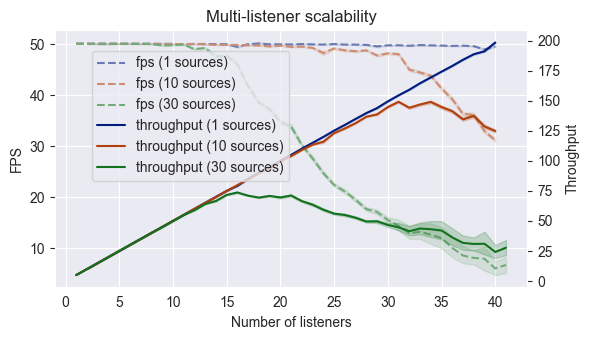

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

experiment_path = "outputs/exp_1/"
image_path = experiment_path + "/plots/"

files = ["1", "10", "30"]
labels = ["1_audio_sources", "10_audio_sources", "30_audio_sources"]
dfs_unity = [pd.read_feather(f"{experiment_path}/unity_{x}.feather") for x in files]

def save_fig(fig_name):
    plt.title(f"{fig_name}")
    plt.savefig(image_path + "/" + fig_name + f"_combined.png")

# fig, ax1 = plt.subplots()
fig, ax1 = plt.subplots(figsize=(6, 3.5))
ax2 = ax1.twinx()
colors = sns.color_palette("dark", len(files))

for i, df in enumerate(dfs_unity):
    df["duration"] =  df["timestamp"] - df["start_timestamp"]
    df["env_time"] = df["duration"] / df["num_iters"]
    df["throughput"] = (df["num_iters"] / df["duration"]) * df["num_envs"]
    df["fps"] = 1 / df["env_time"] * 10

    color = colors[i]
    name = labels[i].replace("_audio_sources", "")
    sns.lineplot(data=df, x="num_envs", y="throughput", ax=ax2, label=f"throughput ({name} sources)", color=color, linestyle='-')
    color_light = sns.light_palette(color, n_colors=10)[5]
    sns.lineplot(data=df, x="num_envs", y="fps", ax=ax1, label=f"fps ({name} sources)", color=color_light, linestyle='--')
    plt.legend()

ax1.set_ylabel('FPS')
ax1.set_xlabel('Number of listeners')
# ax1.set_ylim(-2, 52)
ax2.grid(None)
ax2.set_ylabel('Throughput')
ax1.get_legend().remove()
ax2.get_legend().remove()
fig.legend(loc="upper left", bbox_to_anchor=(0.15, 0.86))
plt.title(f"Multi-listener scalability")
plt.tight_layout()
plt.savefig(f"throughput_fps.png")
plt.show()